### Part1: Data Preprocessing

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('credit_train.csv')

In [4]:
df_test = pd.read_csv('credit_test.csv')

In [5]:
print(df_train.shape)
print(df_test.shape)

(100514, 19)
(10353, 18)


In [6]:
df = pd.concat([df_train, df_test])

/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.shape

(110867, 19)

In [8]:
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History
0,1167493.0,1.0,709.0,228190.0,445412.0,981165ec-3274-42f5-a3b4-d104041a9ca9,Home Mortgage,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,416746.0,5214.74,NaN,1.0,6.0,Home Improvements,0.0,Short Term,8 years,17.2
1,NaN,0.0,NaN,229976.0,262328.0,2de017a3-2e01-49cb-a581-08169e83be29,Home Mortgage,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,850784.0,33295.98,8.0,0.0,35.0,Debt Consolidation,0.0,Short Term,10+ years,21.1
2,2231892.0,0.0,741.0,297996.0,99999999.0,5efb2b2b-bf11-4dfd-a572-3761a2694725,Own Home,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,750090.0,29200.53,29.0,1.0,18.0,Debt Consolidation,0.0,Short Term,8 years,14.9
3,806949.0,0.0,721.0,256329.0,347666.0,e777faab-98ae-45af-9a86-7ce5b33b1011,Own Home,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,386958.0,8741.90,NaN,0.0,9.0,Debt Consolidation,0.0,Long Term,3 years,12.0
4,NaN,0.0,NaN,253460.0,176220.0,81536ad9-5ccf-4eb8-befb-47a4d608658e,Rent,d4062e70-befa-4995-8643-a0de73938182,Fully Paid,427174.0,20639.70,NaN,0.0,15.0,Debt Consolidation,0.0,Short Term,5 years,6.1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110867 entries, 0 to 10352
Data columns (total 19 columns):
Annual Income                   88865 non-null float64
Bankruptcies                    109774 non-null float64
Credit Score                    88865 non-null float64
Current Credit Balance          110000 non-null float64
Current Loan Amount             110000 non-null float64
Customer ID                     110000 non-null object
Home Ownership                  110000 non-null object
Loan ID                         110000 non-null object
Loan Status                     100000 non-null object
Maximum Open Credit             109998 non-null float64
Monthly Debt                    110000 non-null float64
Months since last delinquent    51553 non-null float64
Number of Credit Problems       110000 non-null float64
Number of Open Accounts         110000 non-null float64
Purpose                         110000 non-null object
Tax Liens                       109989 non-null float64
Te

In [10]:
df.isna().sum()/len(df)
#include null value to analysis, not drop the value
#null, high credit score
#cluster and take average
#method: months solvent? set Null value will be zero; small value 

Annual Income                   0.198454
Bankruptcies                    0.009859
Credit Score                    0.198454
Current Credit Balance          0.007820
Current Loan Amount             0.007820
Customer ID                     0.007820
Home Ownership                  0.007820
Loan ID                         0.007820
Loan Status                     0.098018
Maximum Open Credit             0.007838
Monthly Debt                    0.007820
Months since last delinquent    0.535001
Number of Credit Problems       0.007820
Number of Open Accounts         0.007820
Purpose                         0.007820
Tax Liens                       0.007919
Term                            0.007820
Years in current job            0.049753
Years of Credit History         0.007820
dtype: float64

In this case, Month since last delinqunet has over 50% of missing values, we can explore this variable and transform it into categorical variable.

In [11]:
#fill in missing values with zero and observe distribution 
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)

In [12]:
import seaborn as sns
sns.distplot(df['Months since last delinquent'])

In [13]:
#from the plot, we can divdie Months since last delinquent into following categories:
#0: no delinquent, 0~25: 2 years, 25~50: 4 years, 50 ~75: 6 years, >75: over 6 years
df['Delinquent Time'] = 0
df.loc[(df['Months since last delinquent'] == 0), 'Delinquent Time'] = 0
df.loc[(df['Months since last delinquent']>0)&(df['Months since last delinquent']<= 25),'Delinquent Time'] = 2
df.loc[(df['Months since last delinquent']>25)&(df['Months since last delinquent']<= 50),'Delinquent Time'] = 4
df.loc[(df['Months since last delinquent']>50)&(df['Months since last delinquent']<= 75),'Delinquent Time'] = 6
df.loc[(df['Months since last delinquent']>75),'Delinquent Time'] = 6

In [14]:
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Months since last delinquent,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time
0,1167493.0,1.0,709.0,228190.0,445412.0,981165ec-3274-42f5-a3b4-d104041a9ca9,Home Mortgage,14dd8831-6af5-400b-83ec-68e61888a048,Fully Paid,416746.0,5214.74,0.0,1.0,6.0,Home Improvements,0.0,Short Term,8 years,17.2,0
1,NaN,0.0,NaN,229976.0,262328.0,2de017a3-2e01-49cb-a581-08169e83be29,Home Mortgage,4771cc26-131a-45db-b5aa-537ea4ba5342,Fully Paid,850784.0,33295.98,8.0,0.0,35.0,Debt Consolidation,0.0,Short Term,10+ years,21.1,2
2,2231892.0,0.0,741.0,297996.0,99999999.0,5efb2b2b-bf11-4dfd-a572-3761a2694725,Own Home,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,Fully Paid,750090.0,29200.53,29.0,1.0,18.0,Debt Consolidation,0.0,Short Term,8 years,14.9,4
3,806949.0,0.0,721.0,256329.0,347666.0,e777faab-98ae-45af-9a86-7ce5b33b1011,Own Home,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,Fully Paid,386958.0,8741.90,0.0,0.0,9.0,Debt Consolidation,0.0,Long Term,3 years,12.0,0
4,NaN,0.0,NaN,253460.0,176220.0,81536ad9-5ccf-4eb8-befb-47a4d608658e,Rent,d4062e70-befa-4995-8643-a0de73938182,Fully Paid,427174.0,20639.70,0.0,0.0,15.0,Debt Consolidation,0.0,Short Term,5 years,6.1,0


In [15]:
to_drop = 'Months since last delinquent'
df = df.drop(to_drop, axis = 1)

In [16]:
df['Credit Score'].describe()

count    88865.000000
mean      1076.594644
std       1475.581902
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [17]:
#convert credit score with values higher than 5000 smaller 
arr = df['Credit Score'].isna().values
shape = df.shape
for i in range(shape[0]):
    if arr[i] == False:
        if df['Credit Score'].values[i] > 5000:
            tmp = df['Credit Score'].values[i]
            tmp = (tmp*10)/100
            df['Credit Score'] = df['Credit Score'].replace(df['Credit Score'].values[i],tmp)

In [18]:
print(min(df['Credit Score']))
print(max(df['Credit Score']))

585.0
751.0


In [24]:
#Overall, we need to impute missing values for all the columns, since missing values for Months since last delinquent take up over 50% 
import numpy as np
from sklearn.impute import SimpleImputer
# Select string and object columns.
categoric = df.select_dtypes('object')

In [25]:
# Fill numeric columns with mean.
#impute missing values for numerical data : mean
# Select numeric columns.
numeric = df.select_dtypes('number')
df[numeric.columns] = numeric.fillna(numeric.mean())
# Fill object columns with mode.
df[categoric.columns] = categoric.fillna(categoric.agg(lambda x: x.mode().values[0]))

In [26]:
#double check missing values
df.isna().sum()

Annual Income                0
Bankruptcies                 0
Credit Score                 0
Current Credit Balance       0
Current Loan Amount          0
Customer ID                  0
Home Ownership               0
Loan ID                      0
Loan Status                  0
Maximum Open Credit          0
Monthly Debt                 0
Number of Credit Problems    0
Number of Open Accounts      0
Purpose                      0
Tax Liens                    0
Term                         0
Years in current job         0
Years of Credit History      0
Delinquent Time              0
dtype: int64

In [27]:
#convert 'years in current job' to numerical type
## Not sure how to convert 10+ years and less than 1 year to numeric type
## So I used 0 for less than 1 year, and 10 for 10+ years
label = "Years in current job"
df[label] = df[label].replace({'< 1 year':0, '1 year': 1, '2 years': 2,
                                          '3 years':3, '4 years':4, '5 years':5, 
                                          '6 years':6, '7 years':7, '8 years':8, 
                                          '9 years': 9, '10+ years': 10}).astype('int64')

In [28]:
#feature encoding for categorical varaibles
#label encoding: convert each value in a column to a number 
#All the categorical variables except years in current job can be handled with label encoding 
#Years in current job are required to be transformed into numerical variables
#Home ownership and purpose don't have seuqntial characteristic, not use label encoding
#create initial categorical dataframe
categoric_cols = list(categoric.columns)
#categoric_cols.remove('Years in current job')
categoric_cols

['Customer ID',
 'Home Ownership',
 'Loan ID',
 'Loan Status',
 'Purpose',
 'Term',
 'Years in current job']

In [29]:
categoric_cols.remove('Years in current job')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categoric_cols] = df[categoric_cols].apply(le.fit_transform)

In [30]:
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time
0,1.167493e+06,1.0,709.00000,228190.0,445412.0,52478,1,7224,1,416746.0,5214.74,1.0,6.0,5,0.0,1,8,17.2,0
1,1.377449e+06,0.0,716.32393,229976.0,262328.0,15821,1,24818,1,850784.0,33295.98,0.0,35.0,3,0.0,1,10,21.1,2
2,2.231892e+06,0.0,741.00000,297996.0,99999999.0,32811,2,27403,1,750090.0,29200.53,1.0,18.0,3,0.0,1,8,14.9,4
3,8.069490e+05,0.0,721.00000,256329.0,347666.0,79892,2,41293,1,386958.0,8741.90,0.0,9.0,3,0.0,0,3,12.0,0
4,1.377449e+06,0.0,716.32393,253460.0,176220.0,44636,3,73291,1,427174.0,20639.70,0.0,15.0,3,0.0,1,5,6.1,0


In [31]:
#check distribution of data distribution
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [32]:
get_best_distribution(df['Current Loan Amount'])

p value for norm = 0.0


/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:1469: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


p value for exponweib = 0.0
p value for weibull_max = 0.0
p value for weibull_min = 0.0


/Users/cookiepoon/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


p value for pareto = 0.0
p value for genextreme = 0.0
Best fitting distribution: norm
Best p value: 0.0
Parameters for the best fit: (11746206.8279, 31642562.073643554)


('norm', 0.0, (11746206.8279, 31642562.073643554))

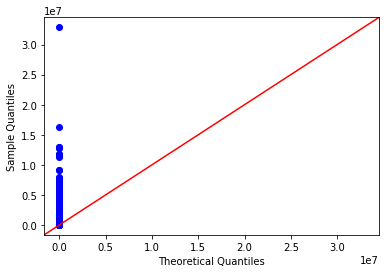

In [33]:
#use qq plot to show some distributions of variables
import statsmodels.api as sm
from scipy.stats import norm
import pylab
current_credit = df['Current Credit Balance']
sm.qqplot(current_credit, line='45')
pylab.show()

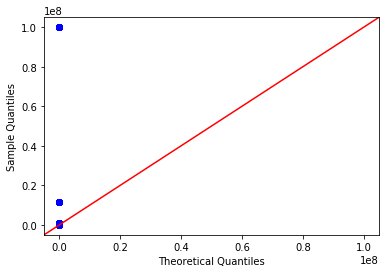

In [34]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
current_loan = df['Current Loan Amount']
sm.qqplot(current_loan, line='45')
pylab.show()
#there are also too many lower end values for current loan amount 

In [35]:
#reselect numerical columns because of the feature engineering of Years in Current Job
numeric = df.select_dtypes('number')
print(numeric.columns)

Index(['Annual Income', 'Bankruptcies', 'Credit Score',
       'Current Credit Balance', 'Current Loan Amount', 'Customer ID',
       'Home Ownership', 'Loan ID', 'Loan Status', 'Maximum Open Credit',
       'Monthly Debt', 'Number of Credit Problems', 'Number of Open Accounts',
       'Purpose', 'Tax Liens', 'Term', 'Years in current job',
       'Years of Credit History', 'Delinquent Time'],
      dtype='object')


In [36]:
#conduct normalization since our dataset is not normally distributed based on our observations
# normalization (x-x_min)/(x_max-x_min) 
#advantge of normalization: 
#1. improve training process
#2. all data are within the same scale
#3. logistic regression, SVM requires normalization
from sklearn import preprocessing
# normalize the continuous variable
numeric_vals = numeric.values#numpy array
transformer = preprocessing.MinMaxScaler()
numeric_normalized = transformer.fit_transform(numeric_vals)
numeric_names = list(numeric.columns)
df[numeric_names] = numeric_normalized

In [37]:
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time
0,0.006592,0.142857,0.746988,0.006940,0.004347,0.593958,0.333333,0.081763,1.0,0.000271,0.011965,0.066667,0.078947,0.333333,0.0,1.0,0.8,0.203288,0.000000
1,0.007861,0.000000,0.791108,0.006995,0.002516,0.179066,0.333333,0.280896,1.0,0.000553,0.076394,0.000000,0.460526,0.200000,0.0,1.0,1.0,0.261584,0.333333
2,0.013024,0.000000,0.939759,0.009063,1.000000,0.371363,0.666667,0.310154,1.0,0.000487,0.066998,0.066667,0.236842,0.200000,0.0,1.0,0.8,0.168909,0.666667
3,0.004413,0.000000,0.819277,0.007796,0.003369,0.904236,0.666667,0.467364,1.0,0.000251,0.020057,0.000000,0.118421,0.200000,0.0,0.0,0.3,0.125561,0.000000
4,0.007861,0.000000,0.791108,0.007709,0.001654,0.505201,1.000000,0.829525,1.0,0.000277,0.047356,0.000000,0.197368,0.200000,0.0,1.0,0.5,0.037369,0.000000


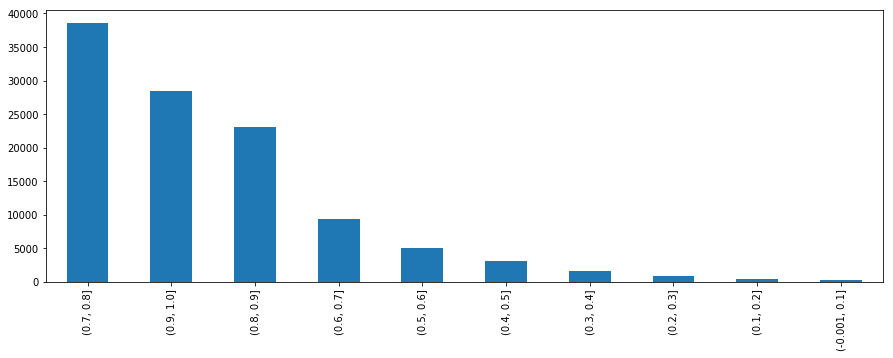

In [38]:
#add an label column as Credit score range
df['Credit Score Range'] = pd.cut(df['Credit Score'], 10)
df['Credit Score Range'].value_counts().plot(kind='bar',figsize=(15,5))

In [39]:
df.head()

,Annual Income,Bankruptcies,Credit Score,Current Credit Balance,Current Loan Amount,Customer ID,Home Ownership,Loan ID,Loan Status,Maximum Open Credit,Monthly Debt,Number of Credit Problems,Number of Open Accounts,Purpose,Tax Liens,Term,Years in current job,Years of Credit History,Delinquent Time,Credit Score Range
0,0.006592,0.142857,0.746988,0.006940,0.004347,0.593958,0.333333,0.081763,1.0,0.000271,0.011965,0.066667,0.078947,0.333333,0.0,1.0,0.8,0.203288,0.000000,"(0.7, 0.8]"
1,0.007861,0.000000,0.791108,0.006995,0.002516,0.179066,0.333333,0.280896,1.0,0.000553,0.076394,0.000000,0.460526,0.200000,0.0,1.0,1.0,0.261584,0.333333,"(0.7, 0.8]"
2,0.013024,0.000000,0.939759,0.009063,1.000000,0.371363,0.666667,0.310154,1.0,0.000487,0.066998,0.066667,0.236842,0.200000,0.0,1.0,0.8,0.168909,0.666667,"(0.9, 1.0]"
3,0.004413,0.000000,0.819277,0.007796,0.003369,0.904236,0.666667,0.467364,1.0,0.000251,0.020057,0.000000,0.118421,0.200000,0.0,0.0,0.3,0.125561,0.000000,"(0.8, 0.9]"
4,0.007861,0.000000,0.791108,0.007709,0.001654,0.505201,1.000000,0.829525,1.0,0.000277,0.047356,0.000000,0.197368,0.200000,0.0,1.0,0.5,0.037369,0.000000,"(0.7, 0.8]"


### Part2: Check features correlation

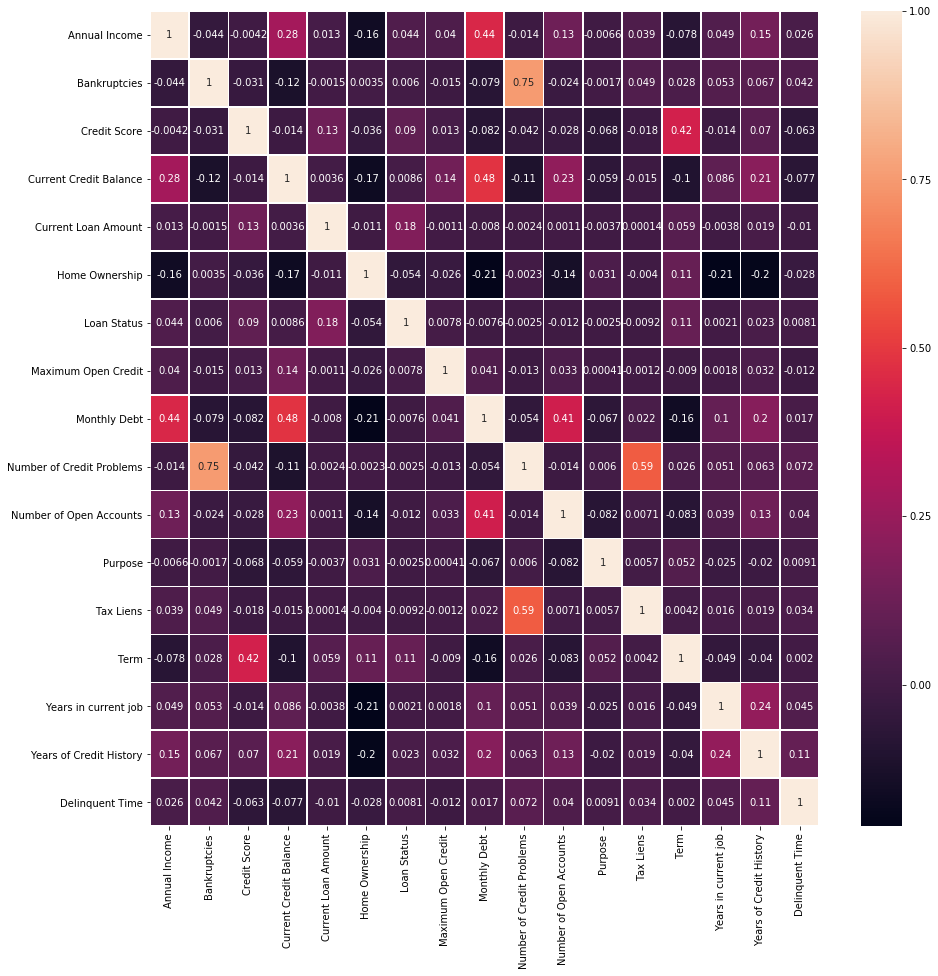

In [41]:
df_corr = df.drop(columns = ['Loan ID', 'Customer ID'])
## Bankruptcies and Number of credit problems have relatively strong positive correlation
## Number of credit problems and Tax lien have relatively strong postiive correlation
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr.corr(), annot = True,linewidths=.8, ax=ax)

### Part3: Training and Testiing data split

In [40]:
df.isna().sum()/len(df)

Annual Income                0.0
Bankruptcies                 0.0
Credit Score                 0.0
Current Credit Balance       0.0
Current Loan Amount          0.0
Customer ID                  0.0
Home Ownership               0.0
Loan ID                      0.0
Loan Status                  0.0
Maximum Open Credit          0.0
Monthly Debt                 0.0
Number of Credit Problems    0.0
Number of Open Accounts      0.0
Purpose                      0.0
Tax Liens                    0.0
Term                         0.0
Years in current job         0.0
Years of Credit History      0.0
Delinquent Time              0.0
Credit Score Range           0.0
dtype: float64

In [42]:
to_drop = ["Credit Score", "Credit Score Range"]
X = df.drop(to_drop, axis = 1)
y = df["Credit Score"]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 83150 observation with 18 features
test data has 27717 observation with 18 features
